# 2020级 初一生物成绩统计分析

In [14]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 设置plt，正确显示中文
plt.rcParams['font.family']='Heiti TC'
plt.rcParams['axes.unicode_minus']=False

In [3]:
out_path = './output'
if not os.path.exists(out_path):
    os.makedirs(out_path)

In [4]:
files_path = './data/'
file_names = sorted([file for file in os.listdir(files_path) if file.endswith('.xlsx')], key=lambda x: int(re.findall(r'(\d+)', x)[0]))

file_names

['一1成绩 统计.xlsx',
 '一2成绩 统计 不完全.xlsx',
 '一4 成绩 统计.xlsx',
 '一5成绩 统计.xlsx',
 '一6成绩 统计.xlsx',
 '一8成绩 统计.xlsx',
 '一9成绩 统计.xlsx',
 '一10成绩 统计.xlsx']

In [5]:
grade_df = []
for filename in file_names:
    b_file = os.path.join(files_path, filename)
    cls_name = '初一(' + re.findall(r'(\d+)', filename)[0] + ')班'
    b_df = pd.read_excel(b_file)
    for i in b_df.index:
        if True in b_df.iloc[i].str.contains('班别').to_list():
            b_df = pd.DataFrame(b_df.iloc[i+1:-1, :].values, columns=b_df.iloc[i])
            b_df = b_df[['班别', '序号', '姓名', '生物']]
            grade_df.append({cls_name: b_df})
            break
        else:
            continue

In [6]:
result_list = []
for cls_dict in grade_df:
     for key, cls_df in cls_dict.items():
         cuted = pd.cut(cls_df['生物'], bins=[0, 60, 100], labels=['不及格', '及格'], right=False)
         proportion = cuted.value_counts() / cls_df['生物'].count()
         unpass_count = cuted.value_counts()['不及格']
         pass_count = cuted.value_counts()['及格']
         all_count = cls_df['生物'].count()
         score_mean = cls_df['生物'].mean()
         score_max = cls_df['生物'].max()
         score_min = cls_df['生物'].min()
         result_dict = {'全班人数': all_count,
                         '及格人数': pass_count,
                         '不及格人数': unpass_count,
                         '平均分': score_mean,
                         '最高分': score_max,
                         '最低分': score_min,
                         '比例分布': proportion}
         result_list.append({key: result_dict})

In [7]:
result_list

[{'初一(1)班': {'全班人数': 47,
   '及格人数': 6,
   '不及格人数': 41,
   '平均分': 38.61702127659574,
   '最高分': 72,
   '最低分': 10,
   '比例分布': 不及格    0.87234
   及格     0.12766
   Name: 生物, dtype: float64}},
 {'初一(2)班': {'全班人数': 33,
   '及格人数': 1,
   '不及格人数': 32,
   '平均分': 33.63636363636363,
   '最高分': 62,
   '最低分': 8,
   '比例分布': 不及格    0.969697
   及格     0.030303
   Name: 生物, dtype: float64}},
 {'初一(4)班': {'全班人数': 47,
   '及格人数': 17,
   '不及格人数': 30,
   '平均分': 49.42553191489362,
   '最高分': 75,
   '最低分': 16,
   '比例分布': 不及格    0.638298
   及格     0.361702
   Name: 生物, dtype: float64}},
 {'初一(5)班': {'全班人数': 48,
   '及格人数': 9,
   '不及格人数': 39,
   '平均分': 42.958333333333336,
   '最高分': 76,
   '最低分': 12,
   '比例分布': 不及格    0.8125
   及格     0.1875
   Name: 生物, dtype: float64}},
 {'初一(6)班': {'全班人数': 47,
   '及格人数': 7,
   '不及格人数': 40,
   '平均分': 40.91489361702128,
   '最高分': 74,
   '最低分': 17,
   '比例分布': 不及格    0.851064
   及格     0.148936
   Name: 生物, dtype: float64}},
 {'初一(8)班': {'全班人数': 57,
   '及格人数': 52,
   '不及格人数': 5,
   '平

In [8]:
result_df = pd.DataFrame({})

In [9]:
for bio_result in result_list:
    bio_df = pd.DataFrame(bio_result)
    result_df = pd.concat([result_df, bio_df.loc[:'最高分',:]], axis=1)

In [16]:
result_df.to_excel(os.path.join(out_path, '初一生物部分成绩结果汇总.xlsx'), float_format='%.2f')

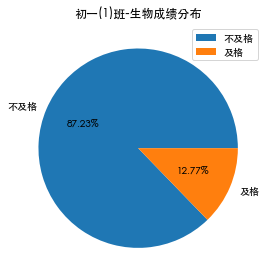

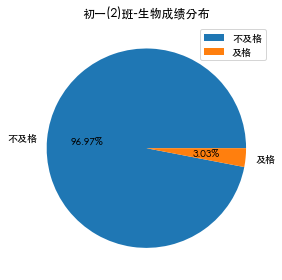

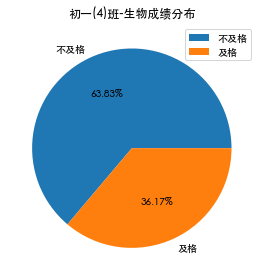

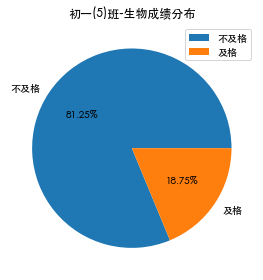

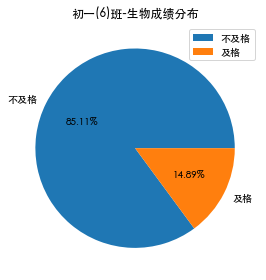

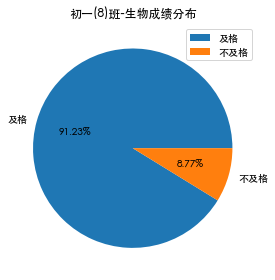

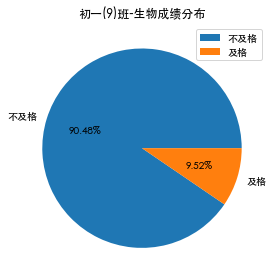

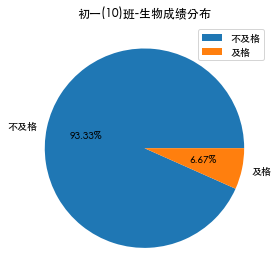

In [18]:
for bio_result in result_list:
    for key, val in bio_result.items():
        plt.figure()
        val['比例分布'].plot.pie(autopct='%.2f%%')
        plt.ylabel('')
        plt.legend(loc='best')
        plt.title(f'{key}-生物成绩分布')
        plt.tight_layout()
        plt.savefig(os.path.join(out_path, f'{key}-生物成绩分布.png'))
        plt.show()